# Clustering Exercise
Analyse this dataset: [1] which looks like this:

[ -5.34023562,   4.7472463 ,   3.82332607],
[ -9.58706542,  -3.43446551,   9.70183939],
[ -8.38501223,  -3.90279369,   8.51462008],
[  5.7082258 ,   2.65857479,   5.40448245],
[ -7.43166517,  -4.39025105,   9.00321635],
[  5.028509  ,   9.04769521,  -8.54843651],
[  6.37219562,   4.45994039,   4.36935755],
[ -8.35525163,  -3.51695636,   7.16271385],
[ -3.40526552,   2.28142739,  -7.63117179],
[  5.62156138,   3.43105644,   4.66657363],
...
and 90 more => n = 100
Now answer these two questions:

A) What is the best k? 

B) Can you print the clustering vector?

(e.g. point i=1 belongs to cluster 1, point i=5 belongs to cluster 2, ...)

## What is the best k?

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

plt.rcParams['figure.figsize'] = (16, 9)

# Creating a dataframe from input file
input_file = "edlich-kmeans-A0.csv"
df = pd.read_csv(input_file, header = 0)
df

V1         V2         V3
0  -5.340236   4.747246   3.823326
1  -9.587065  -3.434466   9.701839
2  -8.385012  -3.902794   8.514620
3   5.708226   2.658575   5.404482
4  -7.431665  -4.390251   9.003216
..       ...        ...        ...
95  5.240474   2.983800   5.104915
96 -1.675543   3.780111  -8.060940
97  2.979751  10.772783 -10.093143
98 -5.154519   5.976515   2.794622
99 -4.878509   5.096635   5.659783

[100 rows x 3 columns]

In [49]:
# Removing the non-numeric columns
df = df._get_numeric_data()

# Putting the numeric column names in a python list
numeric_headers = list(df.columns.values)

# Creating a numpy array with the numeric values for input into scikit-learn
X = df.values


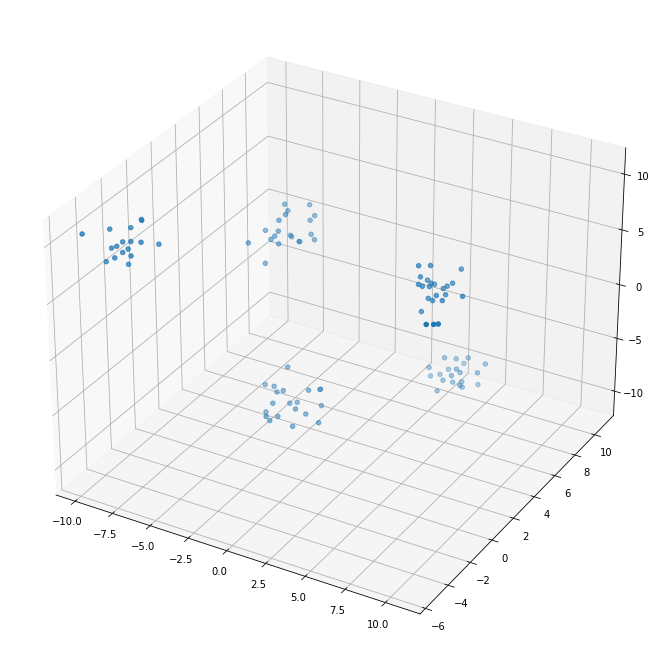

In [50]:
# Plotting the input data
fig = plt.figure()
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)
ax.scatter(X[:, 0], X[:, 1], X[:, 2])

According to the plot, we have 5 clusters. Therefore, we can use sklearn's KMeans with n_clusters=5

In [51]:
# Initializing KMeans
kmeans = KMeans(n_clusters=5)
# Fitting with inputs
kmeans = kmeans.fit(X)
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_

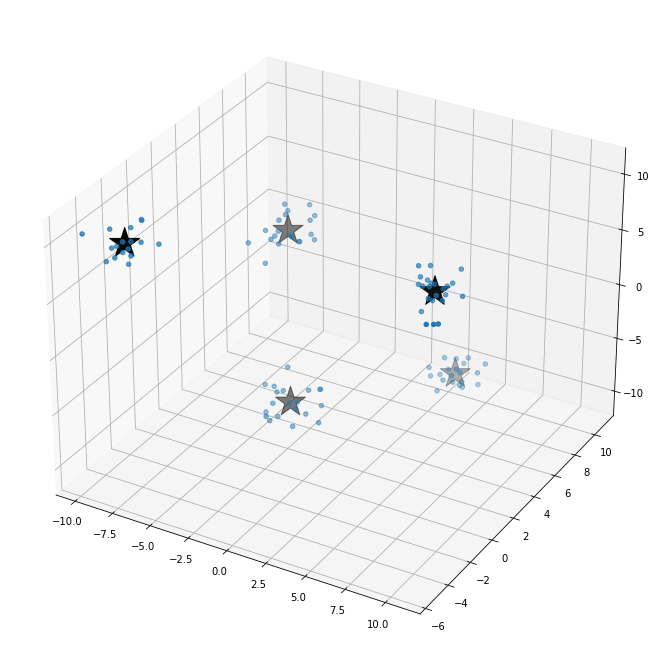

In [52]:
# Plotting the input with the predicted cluster centers
fig = plt.figure()
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)
ax.scatter(X[:, 0], X[:, 1], X[:, 2])
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c='#050505', s=1000)

## Print the clustering vector

The clustering results by kmeans are the predicted labels.

In [53]:
# Printing the labels
print(labels)

[2 1 1 3 1 4 3 1 0 3 1 0 3 4 2 1 0 4 2 2 1 0 2 1 1 3 0 0 0 4 0 0 4 4 1 2 4
 2 0 1 4 4 4 2 4 1 3 3 4 3 3 4 0 0 3 3 2 3 1 4 3 2 3 3 4 3 2 2 2 4 4 3 0 3
 3 0 1 4 3 0 0 4 1 2 2 1 2 2 2 3 0 0 0 1 3 3 0 4 2 2]


In [54]:
# Adding labels to the original dataframe
df['Cluster'] = labels
df

V1         V2         V3  Cluster
0  -5.340236   4.747246   3.823326        2
1  -9.587065  -3.434466   9.701839        1
2  -8.385012  -3.902794   8.514620        1
3   5.708226   2.658575   5.404482        3
4  -7.431665  -4.390251   9.003216        1
..       ...        ...        ...      ...
95  5.240474   2.983800   5.104915        3
96 -1.675543   3.780111  -8.060940        0
97  2.979751  10.772783 -10.093143        4
98 -5.154519   5.976515   2.794622        2
99 -4.878509   5.096635   5.659783        2

[100 rows x 4 columns]